## Kaggle – DataTops®
Luismi ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a Luismi a mejorar ese modelo?

## Métrica: 
Error de raíz cuadrada media (RMSE) es la desviación estándar de los valores residuales (errores de predicción). Los valores residuales son una medida de la distancia de los puntos de datos de la línea de regresión; RMSE es una medida de cuál es el nivel de dispersión de estos valores residuales. En otras palabras, le indica el nivel de concentración de los datos en la línea de mejor ajuste.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## Librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import urllib.request
import bootcampviztools as bt
import funciones as fs
import seaborn as sns

## Datos

In [2]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("./data/train.csv", index_col= 0)
df.index.name = None

## Exploración de los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [4]:
fs.describe_df(df)

COL_N,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
DATA_TYPE,object,object,object,float64,object,object,object,object,object,object,object,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,19,480,6,17,36,107,9,37,93,9,165,603
CARDIN (%),0.02,0.53,0.01,0.02,0.04,0.12,0.01,0.04,0.1,0.01,0.18,0.66


In [5]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [6]:
df.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00
229,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42kg,2456.34


In [7]:
df.describe()

,Inches,Price_in_euros
count,912.000000,912.000000
mean,14.981579,1111.724090
std,1.436719,687.959172
min,10.100000,174.000000
25%,14.000000,589.000000
50%,15.600000,978.000000
75%,15.600000,1483.942500
max,18.400000,6099.000000


In [8]:
target = df["Price_in_euros"]

In [9]:
fs.get_features_cat_regression(df, target_col="Price_in_euros",pvalue=0.05) 

['Company', 'TypeName', 'Inches', 'Ram', 'OpSys']

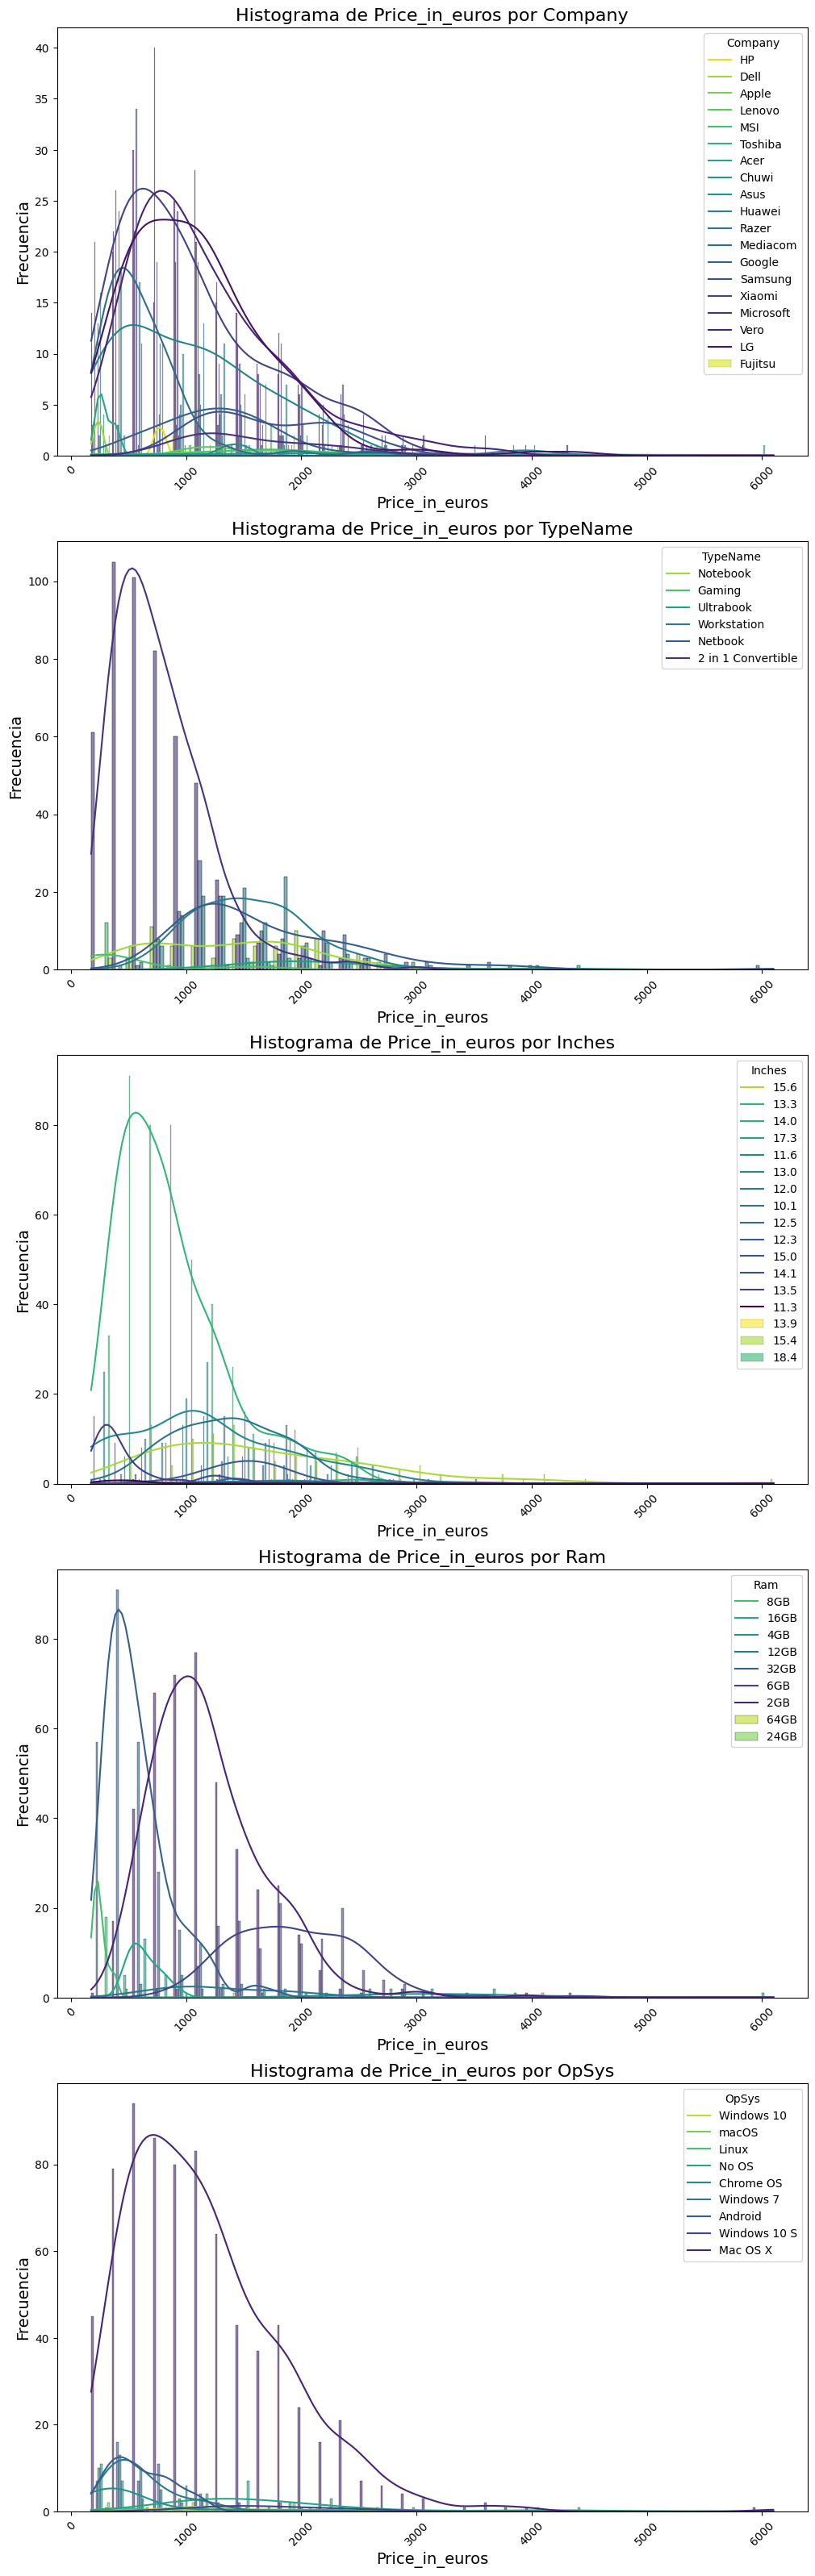

['Company', 'TypeName', 'Inches', 'Ram', 'OpSys']

In [10]:
fs.plot_features_cat_regression(df, target_col="Price_in_euros", columns=['Company', 'TypeName', 'Inches', 'Ram', 'OpSys'],pvalue=0.05)



## Procesado de datos

Nuestro target es la columna `Price_in_euros`

In [11]:
df["inches"] = df.Inches.astype(float)
df['ram_gb'] = df['Ram'].str.replace('GB', '').astype(int)
df["weight_kg"] = df['Weight'].str.replace('kg', '').astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
 12  inches            912 non-null    float64
 13  ram_gb            912 non-null    int32  
 14  weight_kg         912 non-null    float64
dtypes: float64(4), int32(1), object(10)
memory usage: 110.4+ KB


In [13]:
target = "Price_in_euros"
features_num = df.select_dtypes(include=[np.number]).columns.tolist()
features_num.remove("Inches")
features_num.remove(target)
features_num

['inches', 'ram_gb', 'weight_kg']

<Axes: >

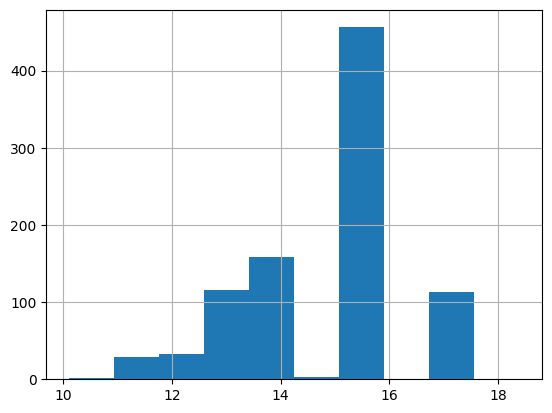

In [14]:
df.inches.hist()

In [15]:
features_cat = df.select_dtypes(include=[object]).columns.tolist()
features_cat.remove("Ram")
features_cat.remove("Weight")
features_cat

['Company',
 'Product',
 'TypeName',
 'ScreenResolution',
 'Cpu',
 'Memory',
 'Gpu',
 'OpSys']

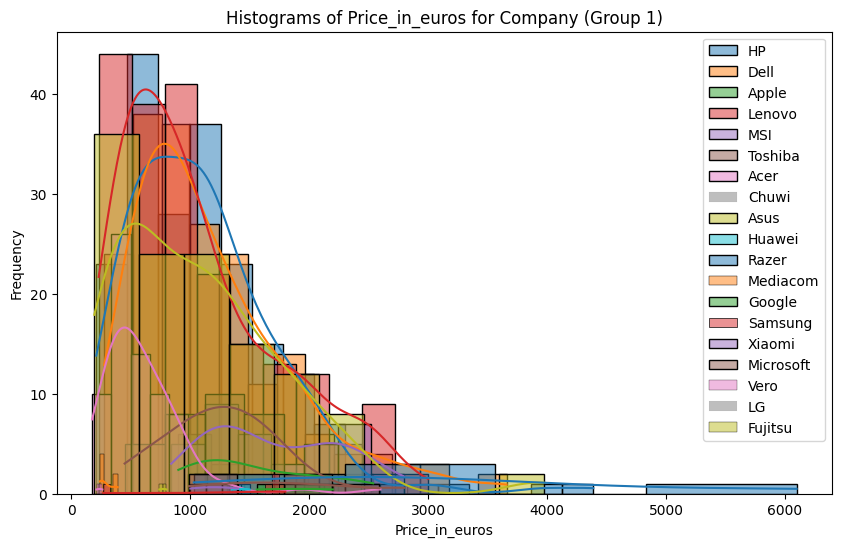

In [16]:
bt.plot_grouped_histograms(df, cat_col="Company", num_col=target, group_size=20)

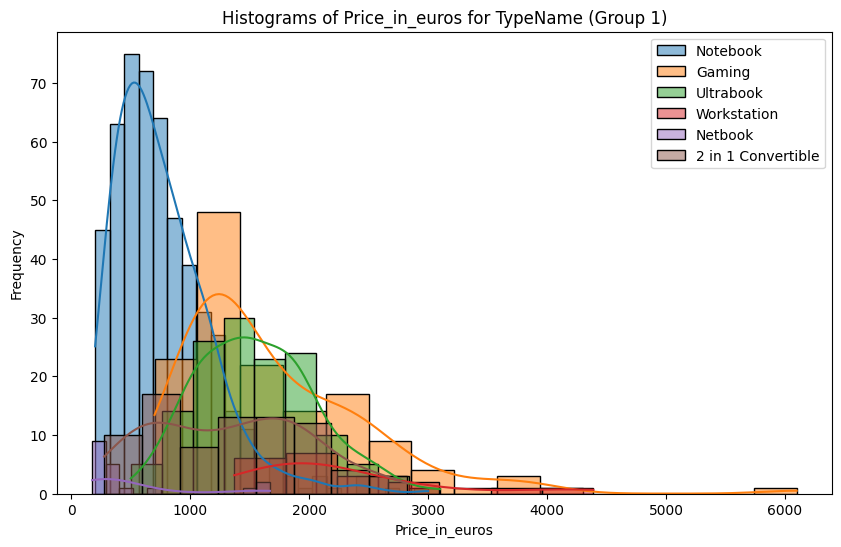

In [17]:
bt.plot_grouped_histograms(df, cat_col="TypeName", num_col=target, group_size=6)

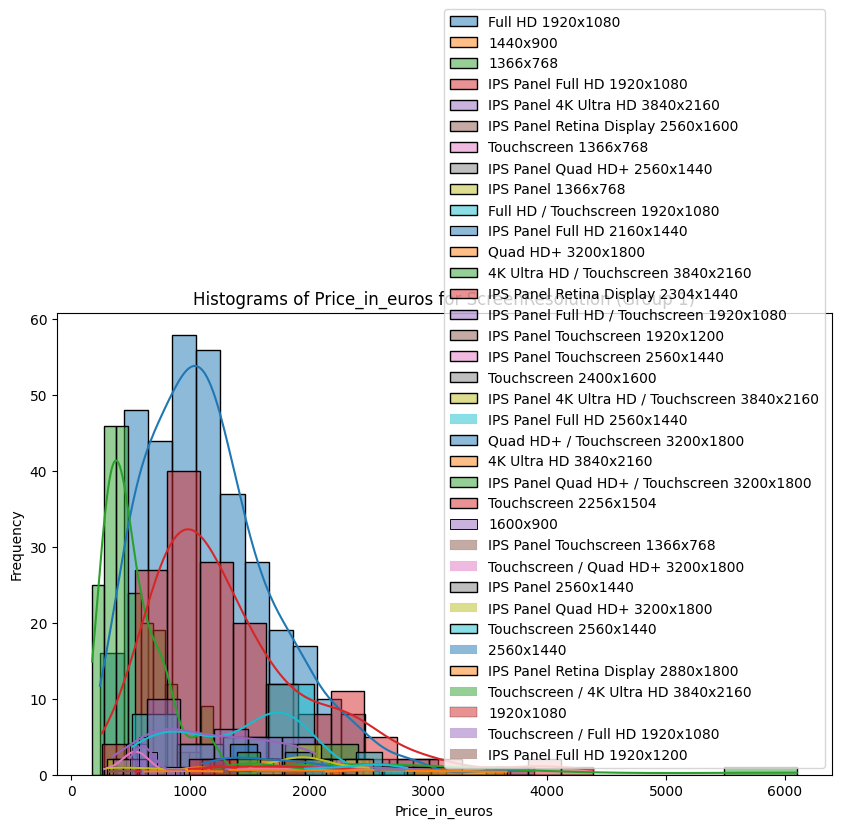

In [18]:
bt.plot_grouped_histograms(df, cat_col="ScreenResolution", num_col=target, group_size=36)

In [19]:
df.ScreenResolution.to_list()

['Full HD 1920x1080',
 'Full HD 1920x1080',
 'Full HD 1920x1080',
 '1440x900',
 'Full HD 1920x1080',
 '1366x768',
 'IPS Panel Full HD 1920x1080',
 'Full HD 1920x1080',
 'Full HD 1920x1080',
 'IPS Panel 4K Ultra HD 3840x2160',
 'IPS Panel Retina Display 2560x1600',
 'Touchscreen 1366x768',
 'Full HD 1920x1080',
 'Full HD 1920x1080',
 'Full HD 1920x1080',
 '1366x768',
 'Full HD 1920x1080',
 'IPS Panel Quad HD+ 2560x1440',
 'Full HD 1920x1080',
 'Full HD 1920x1080',
 'IPS Panel 1366x768',
 'Full HD / Touchscreen 1920x1080',
 'IPS Panel Full HD 1920x1080',
 'Full HD 1920x1080',
 'Full HD 1920x1080',
 'IPS Panel Full HD 1920x1080',
 'Full HD 1920x1080',
 'Full HD 1920x1080',
 '1366x768',
 'IPS Panel Full HD 1920x1080',
 'IPS Panel Full HD 2160x1440',
 'Touchscreen 1366x768',
 'Full HD 1920x1080',
 '1366x768',
 'Full HD 1920x1080',
 'Full HD 1920x1080',
 '1366x768',
 'IPS Panel Full HD 1920x1080',
 'IPS Panel Full HD 1920x1080',
 'IPS Panel Full HD 1920x1080',
 'Full HD 1920x1080',
 '1366x76

array([[<Axes: title={'center': 'inches'}>,
        <Axes: title={'center': 'ram_gb'}>],
       [<Axes: title={'center': 'weight_kg'}>, <Axes: >]], dtype=object)

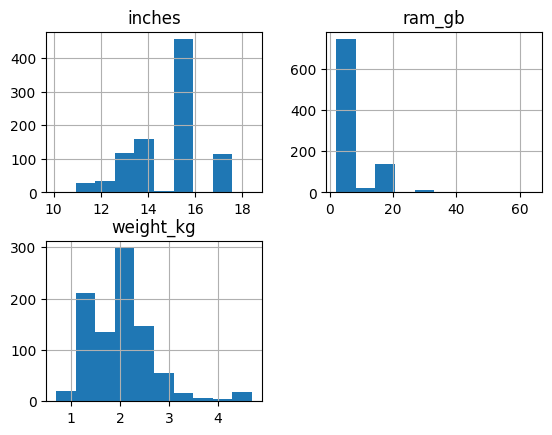

In [20]:
df[features_num].hist()

In [21]:
corr = df[features_num + [target]].corr()
serie_corr = np.abs(corr[target])
serie_corr.sort_values(ascending=False)


Price_in_euros    1.000000
ram_gb            0.738922
weight_kg         0.197086
inches            0.071043
Name: Price_in_euros, dtype: float64

-----------------------------------------------------------------------------------------------------------------

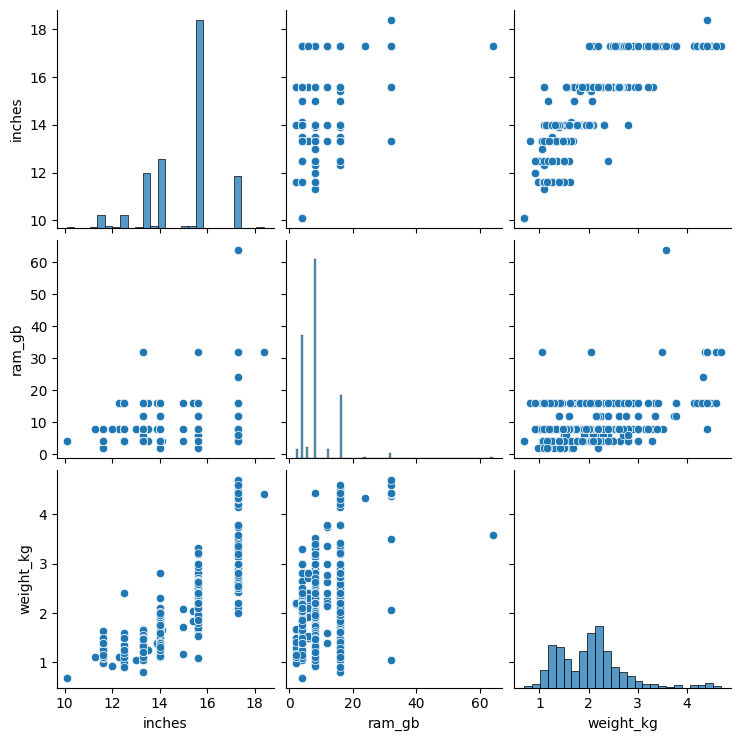

In [22]:
sns.pairplot(df[features_num])

<Axes: >

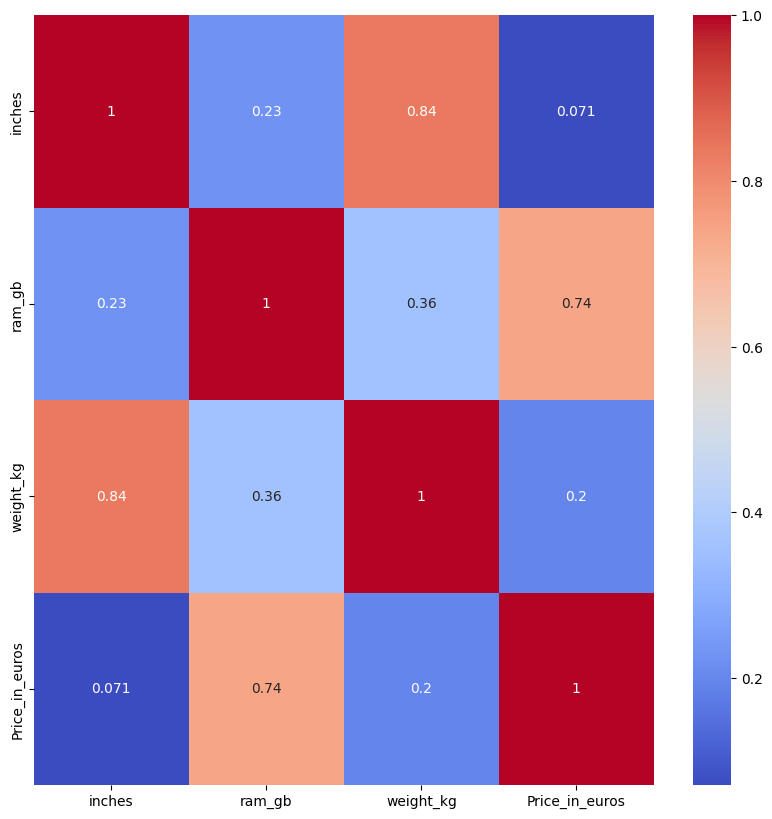

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [24]:
# Convertimos las variables categoricas en dummies:

df = pd.get_dummies(df, columns=features_cat)

In [25]:
# Escalamos las variables numericas:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[features_num] = scaler.fit_transform(df[features_num])

In [26]:
df = df.drop(columns=["Inches", "Ram", "Weight"])

In [27]:
df

,Price_in_euros,inches,ram_gb,weight_kg,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,...,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
755,539.00,0.430676,-0.052193,-0.250996,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
618,879.01,0.430676,1.534472,0.846582,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
909,900.00,0.430676,-0.052193,0.019640,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,898.94,-1.171072,-0.052193,-1.032831,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
286,428.00,0.430676,-0.845526,0.335381,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,800.00,0.430676,-0.052193,0.260205,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1160,1629.00,-1.171072,-0.052193,-0.822337,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
78,519.00,0.430676,-0.052193,0.260205,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
23,258.00,0.430676,-0.845526,-0.250996,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


## Modelado

### 1. Definir X e y

In [28]:
X = df.drop(['Price_in_euros'], axis=1)
y = df['Price_in_euros'].copy()
X.shape

(912, 790)

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Columns: 790 entries, inches to OpSys_macOS
dtypes: bool(787), float64(3)
memory usage: 729.4 KB


In [30]:
X.shape

(912, 790)

In [31]:
y.shape

(912,)

In [32]:
y

755      539.00
618      879.01
909      900.00
2        898.94
286      428.00
         ...   
28       800.00
1160    1629.00
78       519.00
23       258.00
229     2456.34
Name: Price_in_euros, Length: 912, dtype: float64

### 2. Dividir X_train, X_test, y_train, y_test

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [34]:
X_train

,inches,ram_gb,weight_kg,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
1118,1.614577,-0.052193,1.463029,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
153,0.430676,1.534472,0.801476,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
275,-1.171072,-0.052193,-0.987726,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1100,-0.683584,-0.845526,-0.732125,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
131,1.614577,1.534472,1.162323,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,-0.683584,-0.052193,-0.130713,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
996,0.430676,-0.448859,0.260205,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
770,-1.728202,1.534472,-1.273396,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
407,0.430676,-0.845526,0.260205,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [35]:
y_train

1118    2899.00
153     1249.26
275     1958.90
1100    1030.99
131     1396.00
         ...   
578      389.00
996      549.00
770     1859.00
407      306.00
418     1943.00
Name: Price_in_euros, Length: 729, dtype: float64

### 3. Baseline de modelos


In [37]:
param_grid = {
	'n_estimators': [100, 200, 300],
	'max_features': ['auto', 'sqrt', 'log2'],
	'max_depth': [4, 5, 6, 7, 8]
}

from sklearn.model_selection import GridSearchCV

RFmodel = RandomForestRegressor()

grid_search = GridSearchCV(RFmodel, param_grid, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

grid_search.best_params_


Fitting 5 folds for each of 45 candidates, totalling 225 fits


c:\Users\josel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
75 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\josel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\josel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\josel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}

In [38]:
RFmodel = RandomForestRegressor(max_depth=8, max_features= "sqrt", n_estimators=100 ) 

RFmodel.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features='sqrt')

In [39]:
X_test

,inches,ram_gb,weight_kg,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
451,0.430676,-0.052193,0.260205,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
802,0.430676,-0.052193,0.079781,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
723,-0.683584,-0.052193,-0.235960,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
682,-0.683584,-0.845526,-0.596808,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1306,0.430676,-0.845526,0.260205,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.430676,-0.052193,-0.250996,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
626,-2.354973,-0.845526,-1.168149,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
416,-2.354973,-1.242192,-1.318502,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
546,-0.683584,-0.052193,-0.235960,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [40]:
y_pred = RFmodel.predict(X_test)

### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [41]:
RMSE = root_mean_squared_error(y_test, y_pred)
print(RMSE)

486.1039095396352


-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [43]:
X_pred = pd.read_csv("data/test.csv", index_col=0)
X_pred.index.name = None
X_pred.head()


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [44]:
X_pred["inches"] = X_pred.Inches.astype(float)
X_pred['ram_gb'] = X_pred['Ram'].str.replace('GB', '').astype(int)
X_pred["weight_kg"] = X_pred['Weight'].str.replace('kg', '').astype(float)

In [45]:
X_pred = pd.get_dummies(X_pred, columns=features_cat)

In [46]:
# Escalamos las variables numericas:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_pred[features_num] = scaler.fit_transform(X_pred[features_num])

In [47]:
X_pred= X_pred.drop(columns=["Inches", "Ram", "Weight"])

In [48]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Columns: 493 entries, inches to OpSys_macOS
dtypes: bool(490), float64(3)
memory usage: 199.3 KB


In [49]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 451 to 260
Columns: 790 entries, inches to OpSys_macOS
dtypes: bool(787), float64(3)
memory usage: 146.4 KB


In [50]:
# Align columns of X_pred with X_train and fill missing columns with zeros
X_pred = X_pred.reindex(columns=X_train.columns, fill_value=0)

In [51]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Columns: 790 entries, inches to OpSys_macOS
dtypes: bool(318), float64(3), int64(469)
memory usage: 1.5 MB


 ## 2. Replicar el procesado para ``test.csv``

In [52]:
X_pred

,inches,ram_gb,weight_kg,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
209,0.357415,1.420931,0.502123,False,False,False,False,False,False,False,...,0,0,False,False,False,True,False,False,False,False
1281,0.357415,-0.902069,0.502123,True,False,False,False,False,False,False,...,0,0,False,True,False,False,False,False,False,False
1168,0.357415,-0.902069,-0.250117,False,False,False,False,False,False,False,...,0,0,False,False,False,True,False,False,False,False
1231,0.357415,-0.127735,0.187687,False,False,False,False,True,False,False,...,0,0,False,False,False,False,True,False,False,False
1020,-0.786899,-0.902069,-0.174893,False,False,False,False,False,False,False,...,0,0,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,1.573249,1.420931,1.254364,False,False,False,False,False,False,False,...,0,0,False,False,False,False,True,False,False,False
948,-0.786899,-0.902069,-0.897044,False,False,False,False,False,False,False,...,0,0,False,False,False,False,True,False,False,False
483,0.357415,-0.127735,-0.430655,False,False,False,False,True,False,False,...,0,0,False,False,False,False,True,False,False,False
1017,-0.786899,-0.902069,-0.641282,False,False,False,False,False,False,False,...,0,0,False,False,False,False,True,False,False,False


In [53]:
predictions_submit = RFmodel.predict(X_pred)
predictions_submit

array([1449.07804609,  552.9448865 ,  708.0554866 , 1134.51088711,
        923.85218739,  877.83135544,  880.16024591, 1017.02474013,
       1136.97355032,  666.91045531, 1823.54691125, 1296.62893908,
        781.71719944, 1486.82251082,  865.45274469,  872.84145526,
       1503.44809685, 1227.61958837, 1351.51470439,  885.84172214,
       1417.00295234,  745.67718662,  883.46694456, 1329.09925426,
        804.20284251,  932.91995195,  852.0881206 ,  922.85994187,
       2374.14258522,  996.45327378, 1952.74072922,  691.28168942,
        878.6833145 , 2292.13465241, 1507.67655322, 1593.16925156,
        772.1378538 , 1447.97833207,  999.21545209, 1224.88508011,
        930.59657392, 1338.2890755 ,  899.95044454, 1047.95125719,
       1122.55770978, 1263.25551417, 1004.53811424,  750.7352243 ,
        921.92339327,  868.51403883, 1508.1060496 ,  887.49252257,
       1276.85920391,  726.97581939, 1411.141976  , 1377.58376721,
        912.13840919,  957.59559044, 1133.57229577,  945.49082

**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [54]:
# ¿Qué opináis?
# ¿Sí, no?

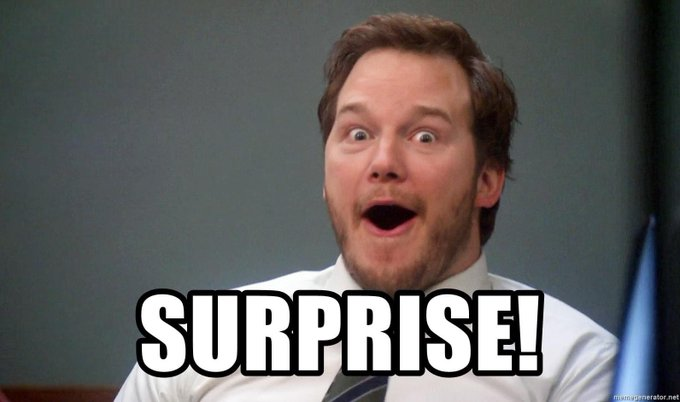

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [55]:
sample = pd.read_csv("data/sample_submission.csv")

In [56]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [57]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [58]:
#¿Cómo creamos la submission?
submission = pd.DataFrame({"laptop_ID": X_pred.index,"Price_in_euros": predictions_submit})

In [59]:
submission.head()

,laptop_ID,Price_in_euros
0,209,1449.078046
1,1281,552.944886
2,1168,708.055487
3,1231,1134.510887
4,1020,923.852187


In [60]:
submission.shape

(391, 2)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [61]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [62]:
chequeador(submission)

You're ready to submit!
